In [5]:
import pandas as pd

In [6]:
final_data = pd.read_excel('final_data.xlsx', sheet_name='Sheet1')

In [7]:
final_data.head()

,Unnamed: 0,user_id,version,minutes_play,day_1_active,day_7_active
0,1335,1336,control,35.746214,True,True
1,1031,1032,control,41.911893,True,True
2,953,954,control,36.501549,False,False
3,1549,3150,treatment,21.765848,False,False
4,671,672,control,15.180415,False,False


In [9]:
from scipy.stats import chisquare 
chisquare([1600,1749])
# 输出结果：卡方统计量，卡方统计量相关的 p-value
# 如果 p-value 小于显著性水平（例如 0.05），则可以拒绝原假设，认为数据不符合预期分布模式；
# 反之，如果 p-value 大于等于显著性水平，则不能拒绝原假设，即认为数据符合预期分布模式。

Power_divergenceResult(statistic=6.629143027769484, pvalue=0.01003235193083798)

Text(0, 0.5, 'User Count')

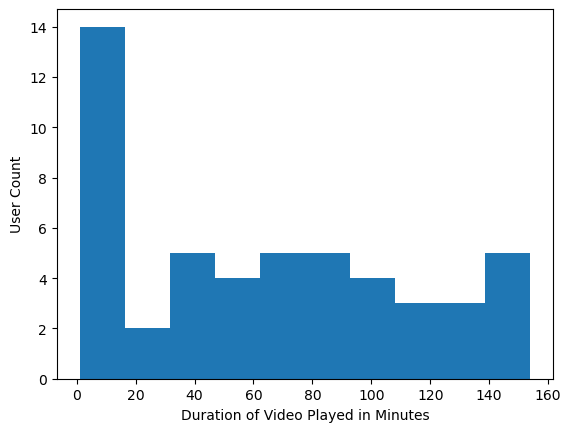

In [15]:
# Plot the Distribution of Minutes Played for Each Group
%matplotlib inline
# variable minutes_play is a float, we have to round it up to the nearest integers before groupin
final_data['minutes_play_integers'] = round(final_data['minutes_play'])
plot_df = final_data.groupby('minutes_play_integers')['user_id'].count()

ax = plot_df.head(n=50).plot(x="minutes_play_integers", y="user_id", kind="hist")
ax.set_xlabel("Duration of Video Played in Minutes")
ax.set_ylabel("User Count")

In [24]:
# 1-day retention
final_data['day_1_active'].mean()

0.32218572708271126

In [27]:
# 1-day retention by group
final_data.groupby('version')['day_1_active'].mean() # 'day_1_active'=True

version
control      0.293125
treatment    0.348771
Name: day_1_active, dtype: float64

<Axes: ylabel='Density'>

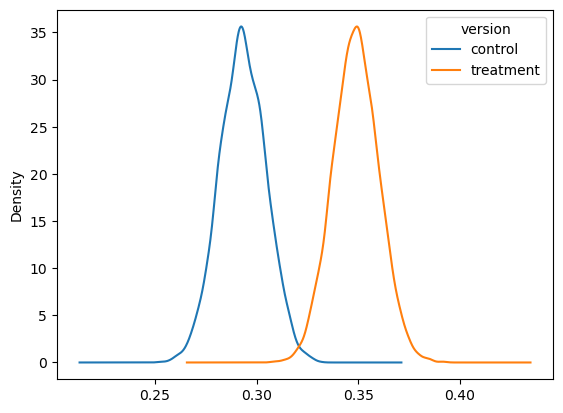

In [29]:
# bootstrap
boot_means = []

# run the simulation for 10k times 
for i in range(10000):
    #frac=1 means randomize the order of all rows 
    boot_sample = final_data.sample(frac=1,replace=True).groupby('version')['day_1_active'].mean()
    boot_means.append(boot_sample)
    # 没想到boolean的值也能求mean()
# a Pandas DataFrame
boot_means = pd.DataFrame(boot_means)

# kernel density estimate
boot_means.plot(kind = 'kde')

In [33]:
# create a new column：diff, which is the difference between the two variants, scaled by the control group
boot_means['diff'] = (boot_means['treatment'] - boot_means['control'])/boot_means['control']*100

Text(0.5, 0, '% diff in means')

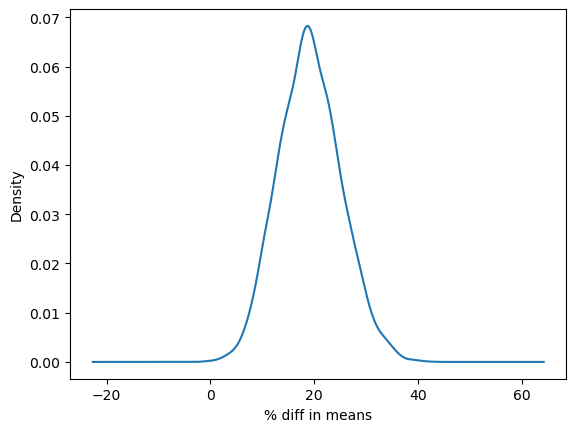

In [34]:
# plot the bootstrap sample difference 
ax = boot_means['diff'].plot(kind = 'kde')
ax.set_xlabel("% diff in means")

In [35]:
boot_means[boot_means['diff'] > 0]

version,control,treatment,diff
day_1_active,0.295784,0.352273,19.098162
day_1_active,0.303448,0.362600,19.493107
day_1_active,0.290604,0.336395,15.757319
day_1_active,0.290876,0.357809,23.010919
day_1_active,0.290771,0.347482,19.503457
...,...,...,...
day_1_active,0.306034,0.364638,19.149214
day_1_active,0.289780,0.348308,20.197488
day_1_active,0.286317,0.356213,24.412083
day_1_active,0.288732,0.340795,18.031310


In [36]:
# p value 
p = (boot_means['diff'] >0).sum()/len(boot_means)
p

0.9997

Text(0.5, 0, '% diff in means')

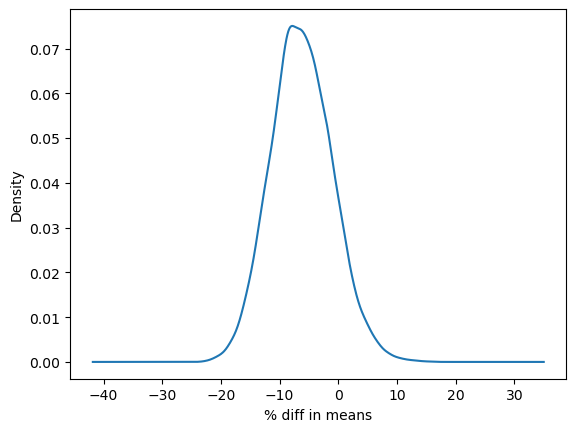

In [38]:
# apply the same analysis to the 7-day metric
boot_7d = []

for i in range(10000):
    #set frac=1 --> sample all rows
    boot_mean = final_data.sample(frac=1,replace=True).groupby('version')['day_7_active'].mean() 
    boot_7d.append(boot_mean)
    
boot_7d = pd.DataFrame(boot_7d)

boot_7d['diff'] = (boot_7d['treatment'] - boot_7d['control'])/boot_7d['control']*100
# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% diff in means")

In [41]:
# Calculating the probability that 7-day retention is greater when the gate is at level 30
p = (boot_7d['diff']>0).sum()/len(boot_7d)
1-p

0.882